In [226]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import numpy as np
from scipy.stats import norm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [154]:
data=pd.read_csv('data.csv')
data.head()
data.columns

Index(['Old Ward Code', 'New ward code', 'Ward', 'Borough', 'Life_Expectancy',
       'Childhood_Obesity', 'Unemployment_rate', 'Public_Transport',
       'Homes_greenspace ', 'GCSE'],
      dtype='object')

<AxesSubplot:xlabel='GCSE', ylabel='Life_Expectancy'>

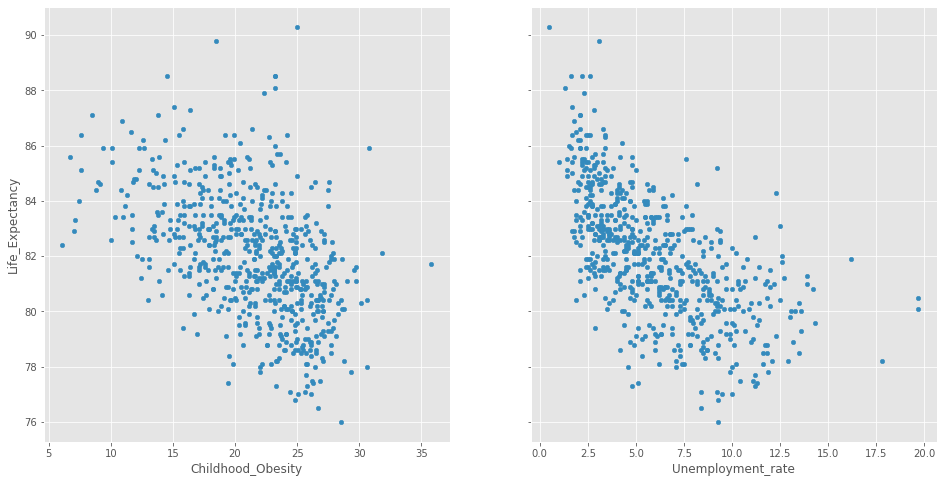

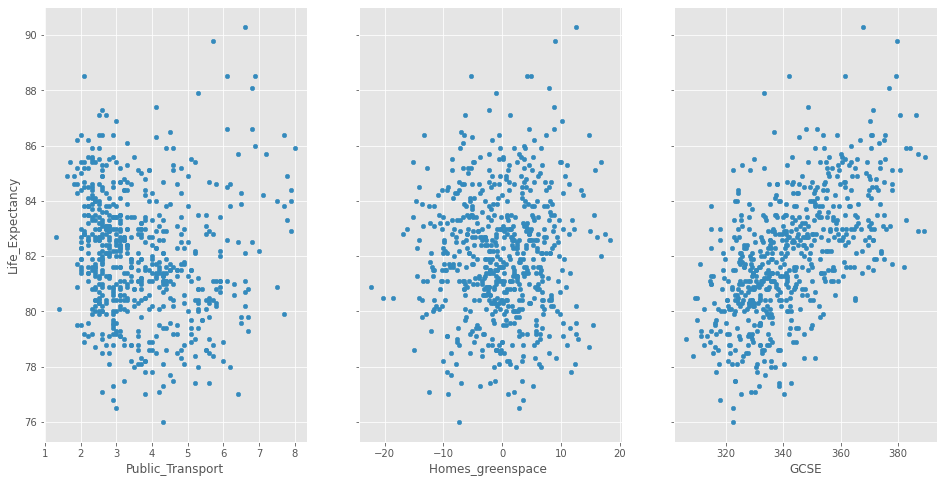

In [163]:
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='Childhood_Obesity', y='Life_Expectancy', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Unemployment_rate', y='Life_Expectancy', ax=axs[1])
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Public_Transport', y='Life_Expectancy', ax=axs[0])
data.plot(kind='scatter', x='Homes_greenspace ', y='Life_Expectancy', ax=axs[1], figsize=(16, 8))
data.plot(kind='scatter', x='GCSE', y='Life_Expectancy', ax=axs[2], figsize=(16, 8))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Life_Expectancy    625 non-null    float64
 1   Childhood_Obesity  625 non-null    float64
 2   Unemployment_rate  625 non-null    float64
 3   Public_Transport   625 non-null    float64
 4   Homes_greenspace   625 non-null    float64
 5   GCSE               625 non-null    float64
dtypes: float64(6)
memory usage: 29.4 KB
                                           Life_Expectancy  \
Life_Expectancy                                     1.0000   
Childhood_Obesity                                  -0.4891   
Unemployment_rate                                  -0.6184   
Public_Transport                                   -0.0798   
Homes_greenspace                                    0.0502   
GCSE                                                0.5821   

                                    

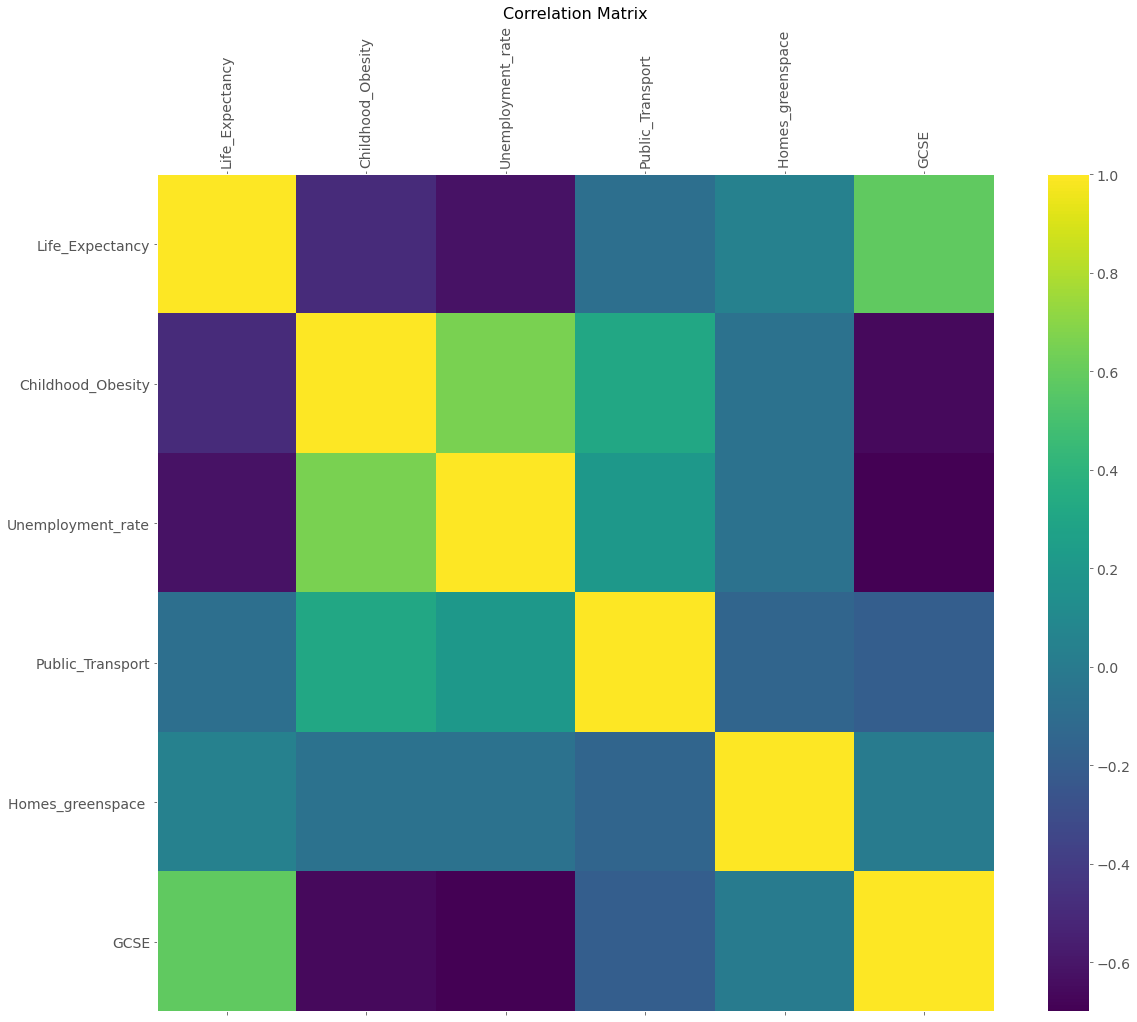

In [234]:

df = data.drop(['Old Ward Code','New ward code','Ward','Borough'],axis=1)
#df = data[['Life_Expectancy','Childhood_Obesity','Unemployment_rate','Crime_rate','Deliberate_Fires','Public_Transport', 'Homes _ greenspace', 'well-being_score']]
df.info()
#corr
print(df.corr())
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

plt.savefig("Correlation Matrix.png", bbox_inches = 'tight')   # 保存图片 注意 在show()之前  不然show会重新创建新的 图片
plt.show()

In [171]:
print(df.describe())

                               Life_Expectancy  \
count                                 625.0000   
mean                                   82.0056   
std                                     2.2639   
min                                    76.0000   
25%                                    80.4000   
50%                                    81.9000   
75%                                    83.4000   
max                                    90.3000   

                             Childhood_Obesity  \
count                                 625.0000   
mean                                   21.2726   
std                                     4.7938   
min                                     6.1000   
25%                                    18.2000   
50%                                    21.9000   
75%                                    24.9000   
max                                    35.8000   

                             Unemployment_rate  \
count                                 625.0000  

In [188]:

# plt.boxplot(df['Life_Expectancy'])
# plt.title('Life_Expectancy')
# # plt.show()
# plt.boxplot(df['Childhood_Obesity'])
# plt.title('Childhood_Obesity')
# plt.show()

In [235]:
#Normalize
df_norm = df.apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))
# df_norm['intercept']=0
df_norm.head()

,Life_Expectancy,Childhood_Obesity,Unemployment_rate,Public_Transport,Homes_greenspace,GCSE
0,0.7273,0.6094,0.0990,0.9552,0.3892,0.5734
1,0.4196,0.5354,0.4167,0.6866,0.5271,0.2679
2,0.2098,0.6667,0.4896,0.2836,0.5049,0.2248
3,0.2238,0.6061,0.4792,0.2388,0.4138,0.2644
4,0.3357,0.6431,0.4167,0.1493,0.5985,0.2834


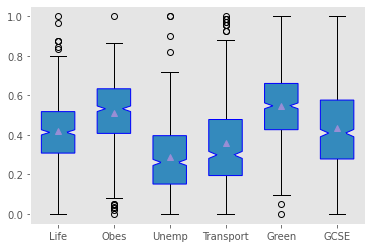

In [236]:
a = plt.boxplot(df_norm,
                patch_artist=True,
                boxprops={'color': 'blue'},
                notch=True, showmeans=True,
                labels=['Life', 'Obes', 'Unemp','Transport','Green','GCSE'],
                widths= 0.6
               )
plt.savefig('box.png')
plt.show()


In [237]:
variables=df_norm.drop('Life_Expectancy',axis=1)
variables.head()

,Childhood_Obesity,Unemployment_rate,Public_Transport,Homes_greenspace,GCSE
0,0.6094,0.0990,0.9552,0.3892,0.5734
1,0.5354,0.4167,0.6866,0.5271,0.2679
2,0.6667,0.4896,0.2836,0.5049,0.2248
3,0.6061,0.4792,0.2388,0.4138,0.2644
4,0.6431,0.4167,0.1493,0.5985,0.2834


In [137]:
x_multi_cons = sm.add_constant(variables) #add row of constants.
x_multi_cons.isna().sum()

const                0
Childhood_Obesity    0
Unemployment_rate    0
Public_Transport     0
Homes_greenspace     0
GCSE                 0
dtype: int64

In [252]:
# calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [253]:
variable_final = drop_column_using_vif_(variables)
# variable_final = variable_final.drop(['Deliberate_Fires', 'Crime_rate'],axis=1)
#using VIF to detect and eliminate multicolinearity. Nothing was dropped, so there is no multicolinearity

In [251]:
variable_final.columns
#the predictor variables after VIF

Index(['Childhood_Obesity', 'Unemployment_rate', 'Public_Transport',
       'Homes_greenspace ', 'GCSE'],
      dtype='object')

In [240]:
#Assume the model to be: y = a_0 + a_1*Childhood_Obesity + a_2*Unemployment_rate + a_3*Crime_rate + a_4*Deliberate_Fires + a_5*Public_Transport+a_6*well-being_score+a_7*Homes_greenspace 
#H0: a_1 = a_2 = a_3 = a_4 = a_5=a_6=a_7= 0;
#H1: At least one of them is not 0.
model1 = sm.OLS(endog=df_norm[['Life_Expectancy']], exog=sm.add_constant(variable_final)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     94.90
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           3.85e-74
Time:                        20:55:26   Log-Likelihood:                 443.47
No. Observations:                 625   AIC:                            -874.9
Df Residuals:                     619   BIC:                            -848.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4334      0.038     11.371      0.000       0.359       0.508
Childhood_Obesity    -0.0721      0.044     -1.648      0.100      -0.158       0.014
Unemployment_rate    -0.3798      0.044     -8.634      0.000      -0.466      -0.293
Public_Transport      0.0649      0.025      2.581      0.010       0.016       0.114
Homes_greenspace      0.0312      0.029      1.078      0.282      -0.026       0.088
GCSE                  0.2103      0.035      6.010      0.000       0.142       0.279
==============================================================================
Omnibus:                        1.188   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                1.032
Skew:                           0.088   Prob(JB):                        0.597
Kurtosis:                       3.094   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
ols_dropped = variable_final.drop(['Childhood_Obesity','Homes_greenspace '],axis=1)
ols_dropped.head()


,Unemployment_rate,Public_Transport,GCSE
0,0.0990,0.9552,0.5734
1,0.4167,0.6866,0.2679
2,0.4896,0.2836,0.2248
3,0.4792,0.2388,0.2644
4,0.4167,0.1493,0.2834


In [242]:
#Assume the model to be: y = a_0 + a_1*Childhood_Obesity + a_2*Unemployment_rate + a_3*Crime_rate + a_4*Deliberate_Fires
#H0: a_1 = a_2 = a_3 = a_4 = 0;
#H1: At least one of them is not 0.
# norm_life=df_norm[['Life_Expectancy']]
model2 = sm.OLS(endog=df_norm[['Life_Expectancy']], exog=sm.add_constant(ols_dropped)).fit()
model2.summary()
                

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     156.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.71e-75
Time:                        20:55:51   Log-Likelihood:                 441.49
No. Observations:                 625   AIC:                            -875.0
Df Residuals:                     621   BIC:                            -857.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4181      0.026     16.271      0.000       0.368       0.469
Unemployment_rate    -0.4081      0.041     -9.934      0.000      -0.489      -0.327
Public_Transport      0.0513      0.024      2.118      0.035       0.004       0.099
GCSE                  0.2294      0.033      7.026      0.000       0.165       0.293
==============================================================================
Omnibus:                        1.324   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                1.146
Skew:                           0.084   Prob(JB):                        0.564
Kurtosis:                       3.127   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
obe = variable_final['Childhood_Obesity']
model3 = sm.OLS(endog=df_norm[['Life_Expectancy']], exog=sm.add_constant(obe)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     195.9
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           6.66e-39
Time:                        20:55:59   Log-Likelihood:                 351.08
No. Observations:                 625   AIC:                            -698.2
Df Residuals:                     623   BIC:                            -689.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6651      0.018     36.219      0.000       0.629       0.701
Childhood_Obesity    -0.4797      0.034    -13.997      0.000      -0.547      -0.412
==============================================================================
Omnibus:                       39.228   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.878
Skew:                           0.504   Prob(JB):                     7.35e-13
Kurtosis:                       4.064   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

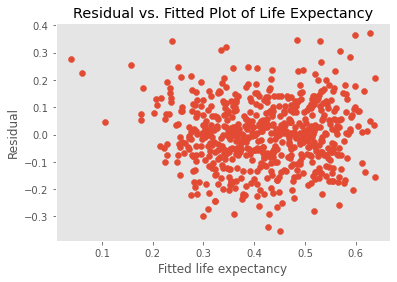

In [246]:
# plot 
plt.scatter(model2.fittedvalues, model2.resid)
# adding title and labels
plt.xlabel('Fitted life expectancy')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Life Expectancy')
plt.show()
#The R-squared value is 0.802, meaning that 80.2% of the total variance of the bike rental can be explained by the variables used in the model
#The plot suggests Independent errors, Normally distributed errors, Equal variance for all x values, residuals bounce randomly around residual=0, suggesting linear relationship. Go to lecture notes to rephrase this.
#The residual is roughly the same across.

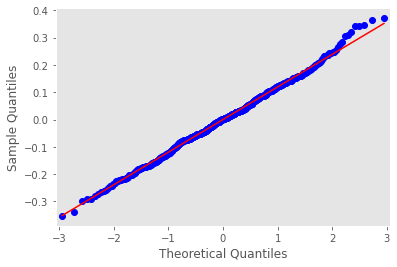

In [245]:
sm.qqplot(model2.resid,line='s')
plt.show()

------------------------------------------
Print the model:
Unemployment_rate : -0.8362117285837911
Public_Transport : 0.2467386079974024
GCSE : 0.024143156285315513
------------------------------------------
Accuracy of the model is: 0.9152
The confusion matrix is:


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:>

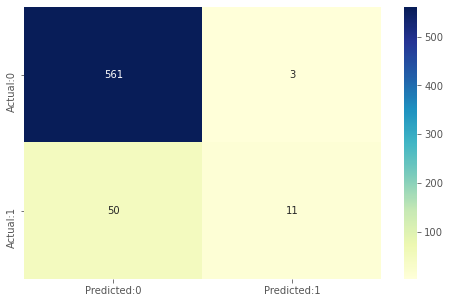

In [248]:
threshold = 85
#Predict if the future crime rate is greater than 0.3.
X = df[['Unemployment_rate', 'Public_Transport', 'GCSE']]
y = df[['Life_Expectancy']] > threshold
###################

logreg = LogisticRegression()
logreg.fit(X, y)
y_pred=logreg.predict(X)

# print the coefficient in the model
print("------------------------------------------")
print("Print the model:")
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")
    
acc = sklearn.metrics.accuracy_score(y,y_pred)
print("Accuracy of the model is: " + str(acc))

# Another evaluation: confusion matrix
print("The confusion matrix is:")
cm=confusion_matrix(y,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")